In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
motorbikes = glob.glob('Motorbikes/*.jpg')
scorpio = glob.glob('Scorpio/*.jpg')
Tata_safari = glob.glob('Tata Safari/*.jpg')

In [25]:
image = []
label = []

for i in motorbikes:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in scorpio:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in Tata_safari:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

In [26]:
label_names = {1 : 'motorbikes',2 : 'scorpio',3 : 'Tata_safari'}

In [27]:
image, label = shuffle(image,label)

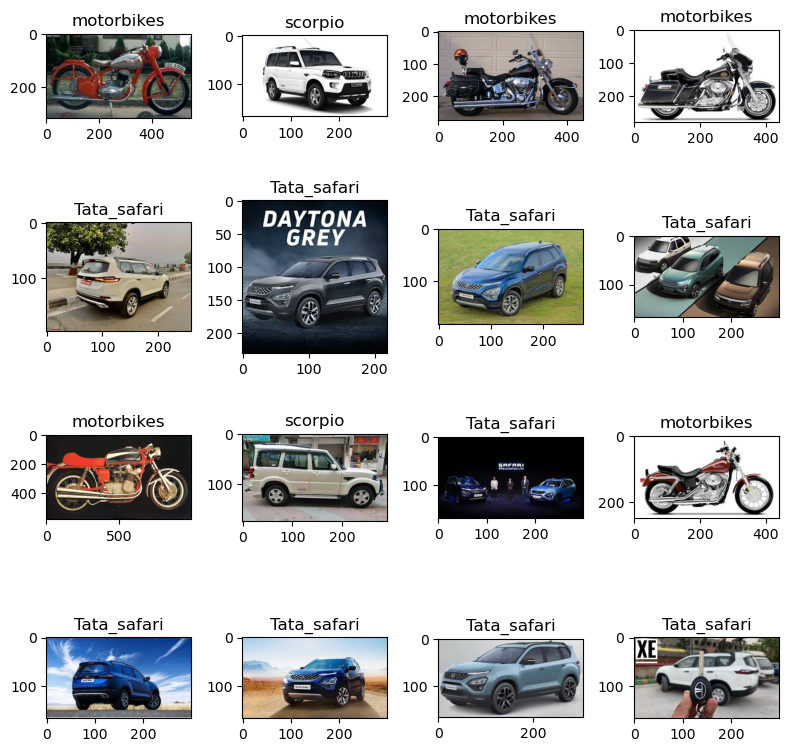

In [28]:
plt.figure(figsize = (8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

In [29]:
X = []

for i in image:
    X.append(resize(i, (300,300,3)))

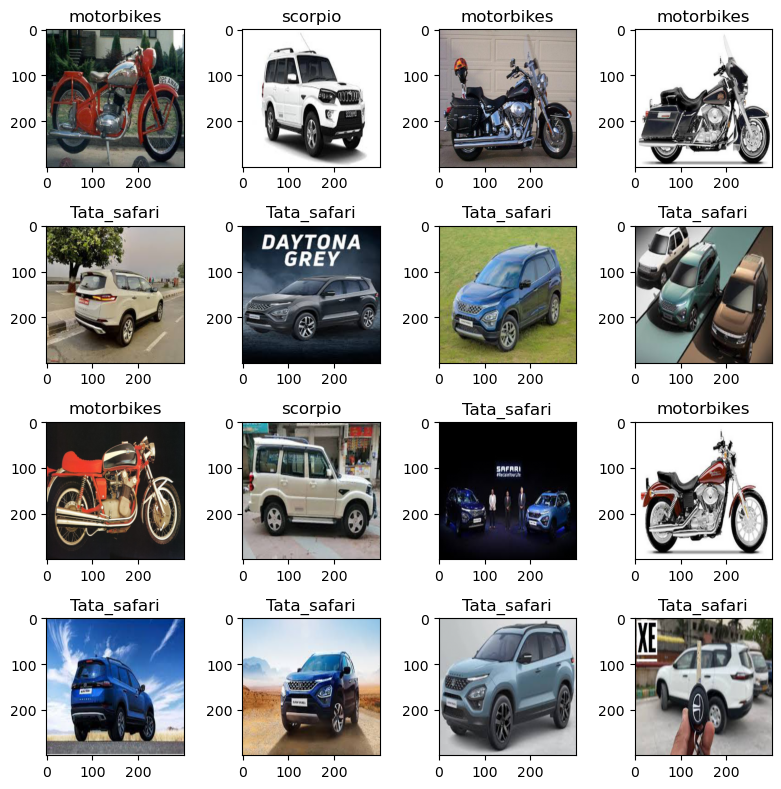

In [30]:
plt.figure(figsize = (8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

In [31]:
X = np.array(X)
y = np.array(label)

In [32]:
X.shape

(420, 300, 300, 3)

In [33]:
d1, d2, d3, d4 = X.shape

In [34]:
X = X.reshape((d1, d2*d3*d4))

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [36]:
model = SVC()

In [37]:
%time model.fit(X_train,y_train)

CPU times: total: 1min 27s
Wall time: 44.3 s


SVC()

In [38]:
y_pred = model.predict(X_test)

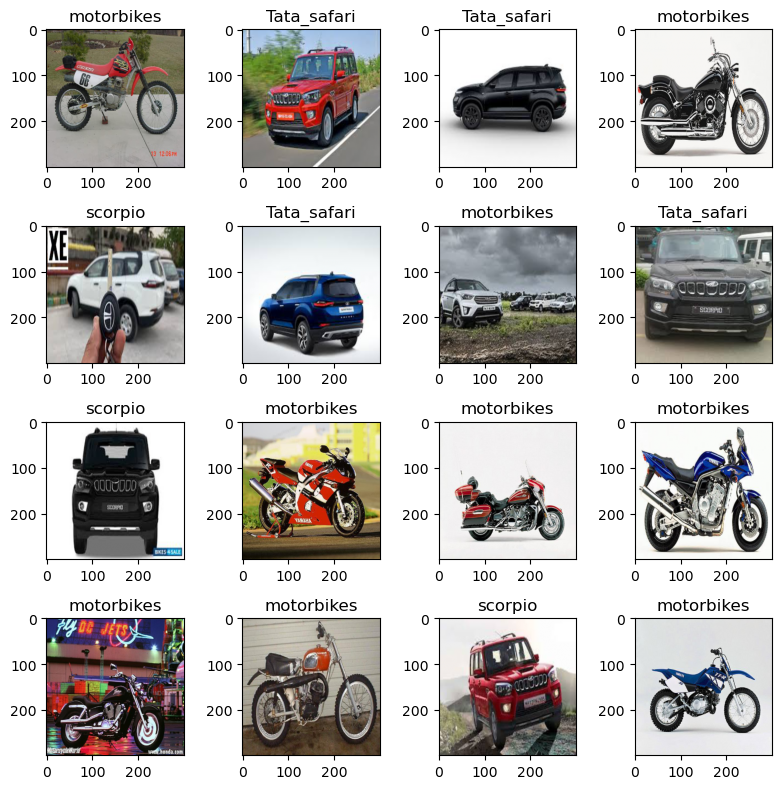

In [39]:
plt.figure(figsize = (8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i].reshape(300,300,3))
    plt.title(label_names[y_pred[i]])
plt.tight_layout()

In [40]:
accuracy_score(y_test,y_pred)

0.7738095238095238

<Axes: >

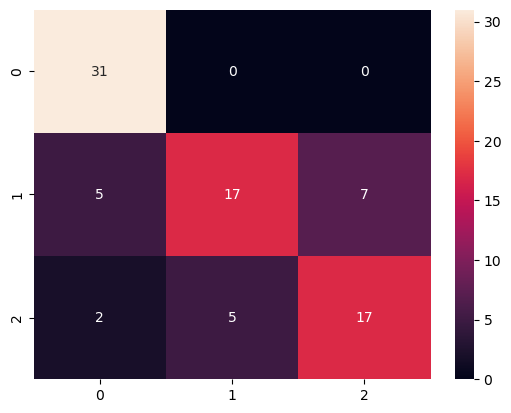

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        31
           2       0.77      0.59      0.67        29
           3       0.71      0.71      0.71        24

    accuracy                           0.77        84
   macro avg       0.77      0.76      0.76        84
weighted avg       0.77      0.77      0.76        84

